## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In [1]:
# Importing Libraries for Analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
%matplotlib nbagg
%matplotlib inline

## Reading and Exploring Data 

In [2]:
# reading the DataFrame 
df= pd.read_csv('data/kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [3]:
# checking number of rows and columns also columns names
print(f'This is the number of rows and columns in our dataframe :' , {df.shape})


This is the number of rows and columns in our dataframe : {(21597, 21)}


In [4]:
# columns names
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [5]:
# checking data overview
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

**we can see that our data types are float64(6), int64(9) and object(6)**


## Data Cleaning 

In [6]:
# checking for duplicate 
duplicate = df[df.duplicated()]
print(f'the number of duplicated rows are:',  len(duplicate))

the number of duplicated rows are: 0


**we can conclude that our data has no duplicates the return `0 duplicate`**

In [7]:
# checking for missing values 
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

**we have missing values in `waterfront (2376)`,`view (63)` and `yr_renovated (3842)` which we have to deal with**

### Dealing with missing values 

In [8]:
# checking the content and number_counts  of waterfront column
print(f'waterfront column contains :', df['waterfront'].unique())
print(f'view column contains :', df['view'].unique())
print(f'yr_renovated column contains :', df['waterfront'].unique())
# checking counts
print(f' waterfront counts is :', df['waterfront'].value_counts())
print(f' view counts is :', df['view'].value_counts())
print(f' yr_renovatedt counts is :', df['yr_renovated'].value_counts())

waterfront column contains : [nan 'NO' 'YES']
view column contains : ['NONE' nan 'GOOD' 'EXCELLENT' 'AVERAGE' 'FAIR']
yr_renovated column contains : [nan 'NO' 'YES']
 waterfront counts is : waterfront
NO     19075
YES      146
Name: count, dtype: int64
 view counts is : view
NONE         19422
AVERAGE        957
GOOD           508
FAIR           330
EXCELLENT      317
Name: count, dtype: int64
 yr_renovatedt counts is : yr_renovated
0.0       17011
2014.0       73
2013.0       31
2003.0       31
2007.0       30
          ...  
1951.0        1
1953.0        1
1946.0        1
1976.0        1
1948.0        1
Name: count, Length: 70, dtype: int64


In [9]:
# since the number of 'NO'(19075) is higher than nUmber of 'YES'(146)
# we can replace 'nan' with 'NO'
df['waterfront'].fillna('NO', inplace=True)
# replacing 'nan' with 'NONE'
df['view'].fillna('NONE',inplace=True)
# replacing 'nan' with 0.0
df['yr_renovated'].fillna(0.0,inplace=True)

In [10]:
# confirming the existence of missing values 
df.isna().sum()


id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

**Great! now we have dealt with missing values and no column with missing values**

### changing data types to Numbers


* in the given data we have 6 objects data types and we need to change these objects to numbers for modeling purpose

In [11]:
# Take apart the date column, put it into three columns as day month and year and have the values numeric.
# changing the date column into date datatypes 
df['date'] = pd.to_datetime(df['date'])
df['day_sold'] = df['date'].map(lambda x: x.day)
df['month_sold'] = df['date'].map(lambda x: x.month)
df['year_sold'] = df['date'].map(lambda x: x.year)
# then dropping the date column
df.drop('date', axis=1, inplace=True)

In [12]:
#  creating numerical values with columns: view,condition and grade from categorical values 

df.view.replace({'NONE': 0, 'AVERAGE': 2, 'FAIR': 1, 'GOOD': 3, 'EXCELLENT': 4}, inplace=True)

df.condition.replace({'Poor': 1, 'Average': 3, 'Fair': 2, 'Good': 4, 'Very Good': 5}, inplace=True)

df.grade.replace({'7 Average': 7, '8 Good': 8, '9 Better': 9, '6 Low Average': 6, '10 Very Good': 10,
                       '11 Excellent': 11, '5 Fair': 5, '12 Luxury': 12, '13 Mansion': 13, '3 Poor': 3,
                        '4 Low': 4}, inplace=True)

In [13]:
# confirming values in sqft_basement column
df['sqft_basement'].unique()

array(['0.0', '400.0', '910.0', '1530.0', '?', '730.0', '1700.0', '300.0',
       '970.0', '760.0', '720.0', '700.0', '820.0', '780.0', '790.0',
       '330.0', '1620.0', '360.0', '588.0', '1510.0', '410.0', '990.0',
       '600.0', '560.0', '550.0', '1000.0', '1600.0', '500.0', '1040.0',
       '880.0', '1010.0', '240.0', '265.0', '290.0', '800.0', '540.0',
       '710.0', '840.0', '380.0', '770.0', '480.0', '570.0', '1490.0',
       '620.0', '1250.0', '1270.0', '120.0', '650.0', '180.0', '1130.0',
       '450.0', '1640.0', '1460.0', '1020.0', '1030.0', '750.0', '640.0',
       '1070.0', '490.0', '1310.0', '630.0', '2000.0', '390.0', '430.0',
       '850.0', '210.0', '1430.0', '1950.0', '440.0', '220.0', '1160.0',
       '860.0', '580.0', '2060.0', '1820.0', '1180.0', '200.0', '1150.0',
       '1200.0', '680.0', '530.0', '1450.0', '1170.0', '1080.0', '960.0',
       '280.0', '870.0', '1100.0', '460.0', '1400.0', '660.0', '1220.0',
       '900.0', '420.0', '1580.0', '1380.0', '475.0', 

In [14]:
#on the code above we see that strings of numbers and ? sign 
#Convert all the ? values to 0.0 then convert from strings to float
df['sqft_basement'] = df["sqft_basement"].replace({"?": '0.0'}).astype(float)


In [15]:
# replacing NO and YES from waterfront with 0 and 1
df['waterfront'] = df['waterfront'].map({'NO': 0, 'YES': 1})

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   price          21597 non-null  float64
 2   bedrooms       21597 non-null  int64  
 3   bathrooms      21597 non-null  float64
 4   sqft_living    21597 non-null  int64  
 5   sqft_lot       21597 non-null  int64  
 6   floors         21597 non-null  float64
 7   waterfront     21597 non-null  int64  
 8   view           21597 non-null  int64  
 9   condition      21597 non-null  int64  
 10  grade          21597 non-null  int64  
 11  sqft_above     21597 non-null  int64  
 12  sqft_basement  21597 non-null  float64
 13  yr_built       21597 non-null  int64  
 14  yr_renovated   21597 non-null  float64
 15  zipcode        21597 non-null  int64  
 16  lat            21597 non-null  float64
 17  long           21597 non-null  float64
 18  sqft_l

**Our data now contains only numeric data types**

In [ ]:
# log transformation inter
# #For each increase of  1
#   unit in  𝑥
#  , we see an associated change of  𝛽
#   in  𝑦
#For each increase of 1% in <feature>, we see an associated change of <coefficient / 100> in <target>

##  Simple Linear Model 

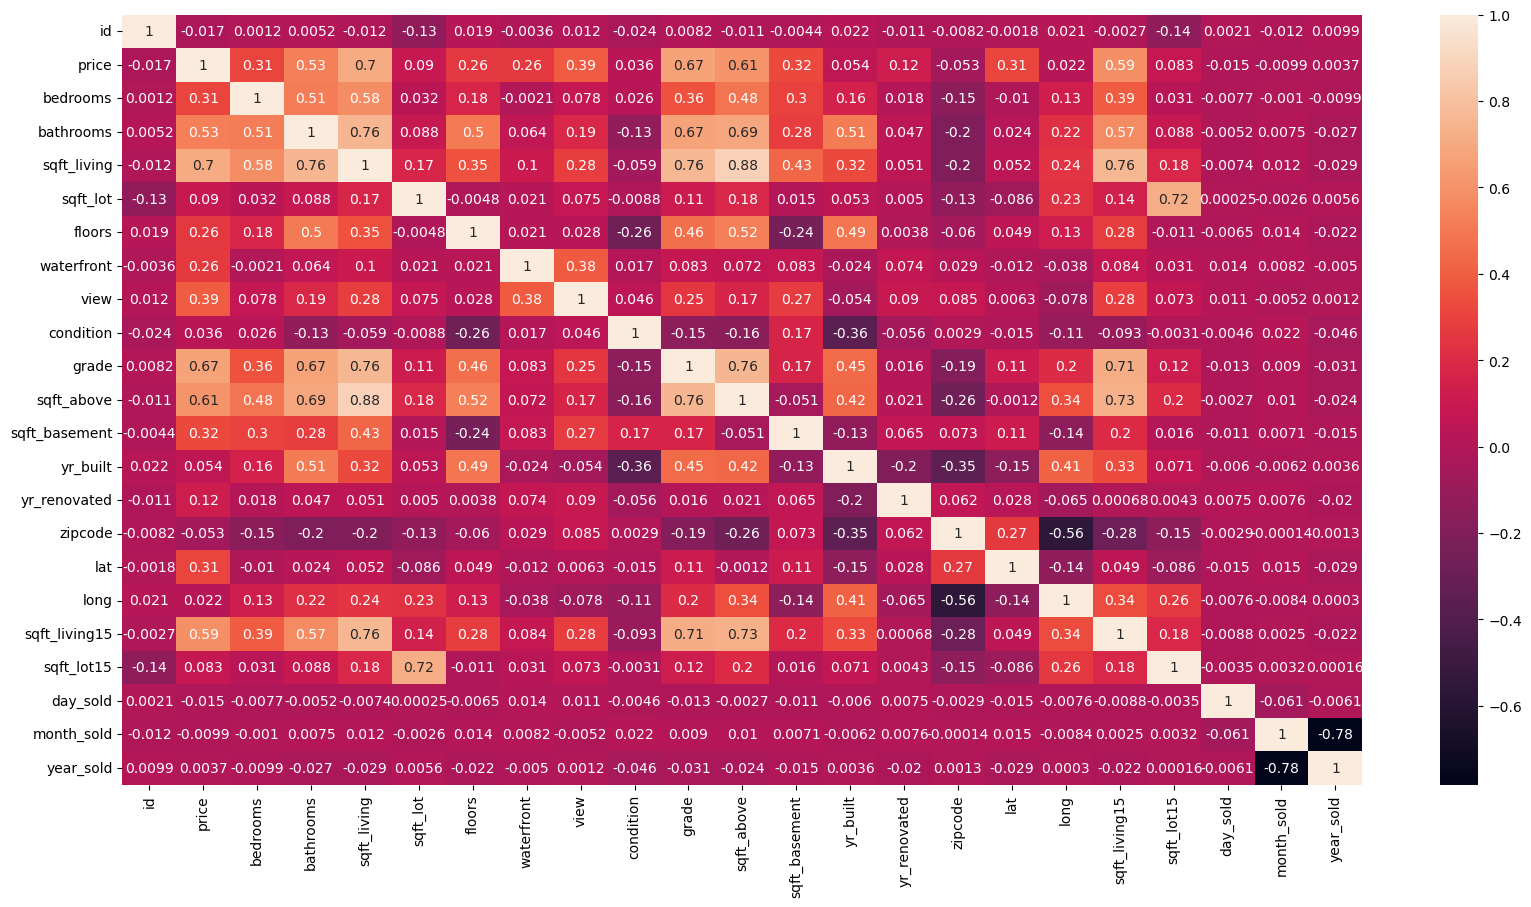

In [17]:
df.corr()
plt.figure(figsize=(20, 10))
sns.heatmap(data=df.corr(), annot=True);

In [18]:
#correlations between the other variables and price
df.corr()["price"]

id              -0.016772
price            1.000000
bedrooms         0.308787
bathrooms        0.525906
sqft_living      0.701917
sqft_lot         0.089876
floors           0.256804
waterfront       0.264306
view             0.393497
condition        0.036056
grade            0.667951
sqft_above       0.605368
sqft_basement    0.321108
yr_built         0.053953
yr_renovated     0.117855
zipcode         -0.053402
lat              0.306692
long             0.022036
sqft_living15    0.585241
sqft_lot15       0.082845
day_sold        -0.014684
month_sold      -0.009928
year_sold        0.003727
Name: price, dtype: float64

we can see that sqft_ living, grade, sqft_above have the highest corelation with the price We use scatter plots to plot each predictor (sqft_ living, grade, sqft_above) against the target variable which is price

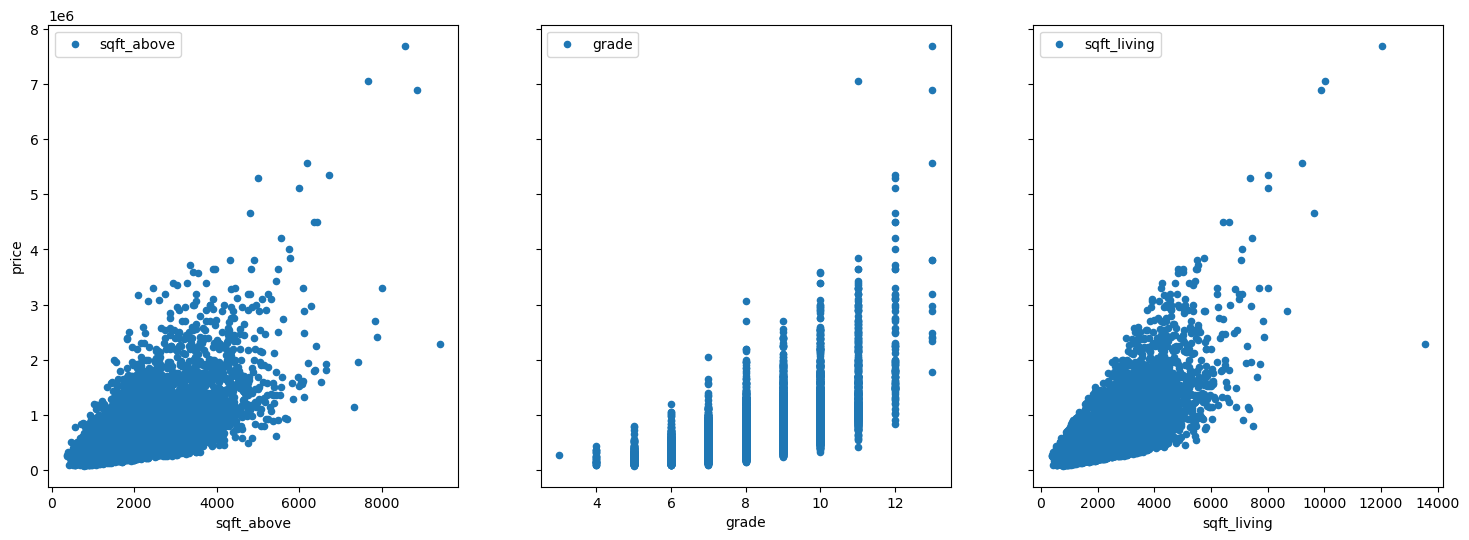

In [19]:
# Visualize the relationship between the preditors and the target using scatter plots
fig, axs = plt.subplots(1, 3, sharey=True, figsize=(18, 6))
for idx, channel in enumerate(['sqft_above', 'grade', 'sqft_living']):
    df.plot(kind='scatter', x=channel, y='price', ax=axs[idx], label=channel)
    axs[idx].legend()

* sqft_living  seems to be a good predictor because it has the most linear relationship with price
* sqft_ above also have a linear relationship, but there is more variance than with sqft_living
* grade has the least linear-looking relationship. There is a lot of variance as well. 


In [20]:
y = df["price"]
# Above sqft_living had the highest correlation
X_baseline = df[["sqft_living"]]

baseline_model = sm.OLS(y, sm.add_constant(X_baseline))
baseline_results = baseline_model.fit()

print(baseline_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                 2.097e+04
Date:                Sat, 30 Dec 2023   Prob (F-statistic):               0.00
Time:                        20:21:04   Log-Likelihood:            -3.0006e+05
No. Observations:               21597   AIC:                         6.001e+05
Df Residuals:                   21595   BIC:                         6.001e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -4.399e+04   4410.023     -9.975      

In [21]:
"""
Our model is statistically significant overall, and explains about 49.3% of the variance
in price.

Both our intercept and our coefficient for sqft_living are statistically significant.

Our intercept is about -4.399e+04 , meaning that a home with 0 square feet 
living area would cost a loss.

Our coefficient for sqft_living  is about 280.8630, which means that for each additional square
foot living area, we expect the price to increase about $280.8630.
"""

'\nOur model is statistically significant overall, and explains about 49.3% of the variance\nin price.\n\nBoth our intercept and our coefficient for sqft_living are statistically significant.\n\nOur intercept is about -4.399e+04 , meaning that a home with 0 square feet \nliving area would cost a loss.\n\nOur coefficient for sqft_living  is about 280.8630, which means that for each additional square\nfoot living area, we expect the price to increase about $280.8630.\n'

###  Build a Multiple Linear Regression Model
 

In [22]:
X = df.drop("price", axis=1)

multy_model = sm.OLS(y, sm.add_constant(X))
multy_results = multy_model.fit()

print(multy_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.702
Model:                            OLS   Adj. R-squared:                  0.702
Method:                 Least Squares   F-statistic:                     2308.
Date:                Sat, 30 Dec 2023   Prob (F-statistic):               0.00
Time:                        20:21:05   Log-Likelihood:            -2.9432e+05
No. Observations:               21597   AIC:                         5.887e+05
Df Residuals:                   21574   BIC:                         5.889e+05
Df Model:                          22                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -6.682e+07   9.97e+06     -6.701

In [23]:
"""
Our new model is statistically significant overall, and explains about 70% of the
variance in Price. This is about 20% more variance explained than the simple
model.

"""



'\nOur new model is statistically significant overall, and explains about 70% of the\nvariance in Price. This is about 20% more variance explained than the simple\nmodel.\n\n'

In [ ]:
df["log_price"]=np.log(df["price"])
df["log_grade"]=np.log(df["grade"])
df["log_sqft_above"]=np.log(df["sqft_above"])
df["log_condition"]=np.log(df["condition"])
df["log_year_sold"]=np.log(df["year_sold"])
df["log_sqft_living"]=np.log(df["sqft_living"])

In [24]:
#Dropping the id and date columns 
def drop_columns(df, to_drop, axis):
    return df.drop(columns=to_drop, axis =axis, inplace=True)

to_drop = ['id', 'day_sold', 'month_sold']
drop_columns(df,to_drop, axis=1)

# Display the resulting DataFrame
df.shape

(21597, 20)

In [25]:
#Checking for Multicollinearity between the variables
corr_df=df.corr().abs().stack().reset_index().sort_values(0, ascending=False)

# zip the variable name columns (Which were only named level_0 and level_1 by default) in a new column named "pairs"
corr_df['pairs'] = list(zip(corr_df.level_0, corr_df.level_1))

# set index to pairs
corr_df.set_index(['pairs'], inplace = True)

#d rop level columns
corr_df.drop(columns=['level_1', 'level_0'], inplace = True)
# rename correlation column as cc rather than 0
corr_df.columns = ['cc']
# Veiwing the highly correlated predictor pairs
corr_df[(corr_df.cc > 0.75) & (corr_df.cc < 1)]


,cc
pairs,
"(sqft_living, sqft_above)",0.876448
"(sqft_above, sqft_living)",0.876448
"(sqft_living, grade)",0.762779
"(grade, sqft_living)",0.762779
"(sqft_living15, sqft_living)",0.756402
"(sqft_living, sqft_living15)",0.756402
"(sqft_above, grade)",0.756073
"(grade, sqft_above)",0.756073
"(sqft_living, bathrooms)",0.755758


* From the observations made above we see that there is a very high correlation between the predictor columns of 'sqft_above', 'sqft_living', 'sqft_living15, 'grade',and 'bathrooms'. Dropping some of these will eliminate multicollinearity features.

* The columns to drop will be 'sqft_above', 'sqft_living15', 'grade',and 'bathrooms

In [26]:
highly_corr_fet =['sqft_above', 'sqft_living15','bathrooms','grade']
drop_columns(df,highly_corr_fet, axis=1)


In [28]:
X = df.drop("price", axis=1)

multy_model = sm.OLS(y, sm.add_constant(X))
multy_results = multy_model.fit()

print(multy_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.664
Model:                            OLS   Adj. R-squared:                  0.664
Method:                 Least Squares   F-statistic:                     2841.
Date:                Sat, 30 Dec 2023   Prob (F-statistic):               0.00
Time:                        20:22:37   Log-Likelihood:            -2.9562e+05
No. Observations:               21597   AIC:                         5.913e+05
Df Residuals:                   21581   BIC:                         5.914e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -5.277e+07   6.97e+06     -7.570

###  Removing Outliers 

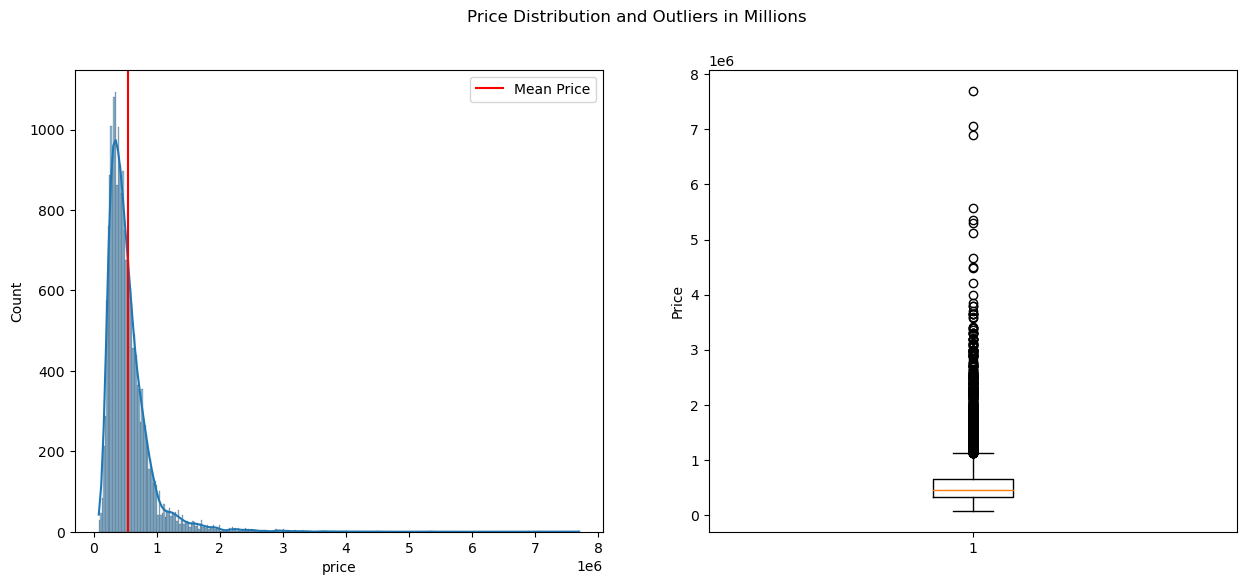

In [29]:
# Creating a figure space and visualizing
fig, ax = plt.subplots(figsize=(15,6), ncols=2)

# Histogram
sns.histplot(df.price, kde=True, ax=ax[0])
ax[0].axvline(df['price'].mean(), color='red', label="Mean Price")

# Boxplot
ax[1].boxplot(df['price'])
ax[1].set_ylabel("Price")
ax[0].legend()

# Title and showing
fig.suptitle("Price Distribution and Outliers in Millions")
plt.show()

The visual data analysis indicates that the predominant range of property prices falls between 0 and 1.2 million, with values exceeding this threshold deemed outliers. However, for the purposes of our analysis, all price points up to 4 million are deemed relevant and will be retained. Prices above the 4 million mark are categorized as genuine outliers and will be excluded from our dataset to maintain the integrity of our analysis.


In [32]:
#Dropping the outliers
df = df.loc[df['price'] < 4_000_000]
# Confirming the changes done
print(f'After dropping outliers: {df.shape}')

After dropping outliers: (21585, 16)


In [ ]:
drff + 

In [27]:
df_corr = df[['price', 'sqft_living', 'grade', 'sqft_above', 'condition', 'year_sold']]

# Calculate correlation matrix
correlation_matrix = df_corr.corr()

# Print correlation matrix
print(correlation_matrix)

KeyError: "['grade', 'sqft_above'] not in index"

In [ ]:
df["log_price"]=np.log(df["price"])
formula_mult = 'log_price  ~  sqft_above + grade + sqft_living + year_sold + '
model = smf.ols(formula=formula_mult, data=df).fit()
model.summary()

we can see that  sqft_ living, grade, sqft_above have the highest corelation with the price
We use scatter plots to plot each predictor (sqft_ living, grade, sqft_above) against the target variable which is price 

In [ ]:
# Visualize the relationship between the preditors and the target using scatter plots
fig, axs = plt.subplots(1, 3, sharey=True, figsize=(18, 6))
for idx, channel in enumerate(['sqft_above', 'grade', 'sqft_living']):
    df.plot(kind='scatter', x=channel, y='price', ax=axs[idx], label=channel)
    axs[idx].legend()

* sqft_living  seems to be a good predictor because it has the most linear relationship with price
* sqft_ above also have a linear relationship, but there is more variance than with sqft_living
* grade has the least linear-looking relationship. There is a lot of variance as well. 


### Run a Simple Linear Regression with Sqft_living as the Predictor

In [ ]:
df["log_price"]=np.log(df["price"])
df["log_sqft_living"]=np.log(df["sqft_living"])

In [ ]:
# Determine X and y values
X = df[["log_sqft_living"]]
y = df["log_price"]
# Create an OLS model
model = sm.OLS(endog=y, exog=sm.add_constant(X))
# Get model results
results = model.fit()
# Display results summary
print(results.summary())

* Overall the model and coefficients are statistically significant, with all p-values well below a standard alpha of 0.05.
* The R-squared value is about 0.455 i.e. 45% of the variance in the target variable can be explained by sqft_living.
* const (Intercept): The intercept of the regression line is 6.7234.
* log_sqft_living: The coefficient for the log-transformed square footage of living space is 0.8376.
  This represents the expected change in the dependent variable (log_price) for a one-unit increase in the independent variable (log_sqft_living).



In [ ]:
### Visualize Model with Sqft_living as Predictor

In [ ]:
# abline_plot version of model fit
fig, ax = plt.subplots(figsize=(15,5))
df.plot(x="log_sqft_living", y="log_price", kind="scatter", label="Data points", ax=ax)
sm.graphics.abline_plot(model_results=results, label="Regression line (sqft_living)", c="red", linewidth=2, ax=ax)
ax.legend()
plt.show()

In [ ]:
# Plotting residuals vs. sqft_living 

fig, ax = plt.subplots(figsize=(15,5))

ax.scatter(df["log_sqft_living"], results.resid)
ax.axhline(y=0, color="black")

ax.set_xlabel("log_sqft_living")
ax.set_ylabel("residuals");

In [ ]:
# Plotting residual Q-Q plot
from scipy.stats import norm
fig, ax = plt.subplots(figsize=(15,5))
sm.graphics.qqplot(results.resid, dist=norm, line="45", fit=True, ax=ax)
ax.set_title("Quantiles of Residuals (log_sqft_living)")
plt.show()

## Multiple Linear Regression

In [ ]:
#correlations between the other variables and price
df.corr()["price"]


###  checking multy collinearity between our variables

In [ ]:
df_corr = df[['price', 'sqft_living', 'grade', 'sqft_above', 'condition', 'year_sold']]

# Calculate correlation matrix
correlation_matrix = df_corr.corr()

# Print correlation matrix
print(correlation_matrix)

In [ ]:
formula_mult = 'price ~ sqft_living + sqft_above + condition + year_sold'
model = smf.ols(formula=formula_mult, data=df).fit()
model.summary()

In [ ]:
formula_mult = 'price ~ sqft_living  + condition + year_sold'
model = smf.ols(formula=formula_mult, data=df).fit()
model.summary()

In [ ]:
df["log_price"]=np.log(df["price"])
df["log_grade"]=np.log(df["grade"])
df["log_sqft_above"]=np.log(df["sqft_above"])
df["log_condition"]=np.log(df["condition"])
df["log_year_sold"]=np.log(df["year_sold"])
df["log_sqft_living"]=np.log(df["sqft_living"])

In [ ]:
formula_mult = 'log_price  ~  log_sqft_above + log_grade + log_sqft_living'
model = smf.ols(formula=formula_mult, data=df).fit()
model.summary()

In [ ]:
# Visualize the relationship between the preditors and the target using scatter plots
fig, axs = plt.subplots(1, 3, sharey=True, figsize=(18, 6))
for idx, channel in enumerate(['log_sqft_above', 'log_grade', 'log_sqft_living']):
    df.plot(kind='scatter', x=channel, y='log_price', ax=axs[idx], label=channel)
    axs[idx].legend()

In [ ]:
# sqft_living  seems to be a good predictor because it has the most linear relationship with price
# sqft_ above also have a linear relationship, but there is more variance than with sqft_living
# grade has the least linear-looking relationship. There is a lot of variance as well. 
# It's not clear from this plot whether a model using grade would be able to predict the target.